# Workshop Análise de Dados em Python para Não Programadores

O material completo desse workshop está disponível no repositório: 

https://github.com/mpatricia/workshop

Para abrir esse notebook direto no Google Colab acesse o link: 

https://colab.research.google.com/github/mpatricia/workshop/blob/main/Notebook.ipynb

---

## 1. Funcionalidades Básicas

Esta é uma célula para exibir textos! 

Usa como base a sintaxe Markdown, que é uma linguagem de marcação com formato de texto simples. 

É útil para documentar as análises, veja alguns exemplos: 

In [ ]:
### Esta é uma célula para executar códigos!

# Usa como base a linguagem de programação Python

# Em Python, o caracter '#' é utilizado para comentários, qualquer conteúdo após '#' é desconsiderado na execução

In [ ]:
# Na linha de comando abaixo, '2 + 2' é executado e 'calculadora' é desconsiderado
2 + 2 # calculadora

In [ ]:
# Imprimir texto com uma célula de código
print('Função calculadora:')
2 + 2

In [ ]:
# Guardar resultado em um objeto chamado 'soma'
soma = 2 + 2

In [ ]:
# Mostrar objeto 'soma'
soma

In [ ]:
# Objetos podem guardar textos e listas (conjunto de strings ou números)
nome = "Fulano"
idade_filhos = [2,4,6]
print(nome, "tem 3 filhos, com idades:", idade_filhos)

In [ ]:
# Média de idade dos filhos de Fulano
mean(idade_filhos)

In [ ]:
# Criar função que calcula a média
def mean(lista_valores):
    soma_valores = 0
    qtd_valores = 0
    for valor in lista_valores:
        soma_valores = soma_valores + valor
        qtd_valores = qtd_valores + 1
    return soma_valores / qtd_valores

In [ ]:
# Calcular a média de idade dos filhos de Fulano
mean(idade_filhos)

In [ ]:
# Importar biblioteca que realiza cálculos numéricos com vetores
import numpy as np 

In [ ]:
# Calcular a média de idade dos filhos de Fulano
np.mean(idade_filhos)

__Dica!__ Atalho para executar os códigos em jupyter notebook:

Selecionar a célula desejada e clicar __Ctrl+Enter__ para executar 

__OU__ clicar __Shift+Enter__ para executar e ir para a próxima célula.

__Observação!__ Neste notebook serão usadas algumas das bibliotecas mais comuns em projetos de análise de dados. 

Caso alguma biblioteca não esteja instalada, retornará uma mensagem de erro: No module named '*'. 

Nesse caso, é preciso instalar. O comando abaixo mostra a instação das bibliotecas seaborn e sklearn:

`!pip install seaborn sklearn`

__SUA VEZ!__

Calcule a soma das idades dos filhos de Fulano:

In [ ]:
# insira suas linhas de comando abaixo:

---

__CRISP-DM__

---

A partir daqui esse jupyter notebook está organizado conforme as etapas do modelo __CRISP-DM__.

## Entendimento e Preparação dos Dados

Fonte dos dados: https://www.kaggle.com/datasets/harlfoxem/housesalesprediction

O dataset contém o preço e outras caracterísicas de imóveis vendidos em King County (Seattle) entre Maio/2014 e Maio/2015.

Dicionário dos dados:
* __id:__ identificador único de cada imóvel
* __price:__ preço
* __bedrooms:__ número de quartos
* __bathrooms:__ número de banheiros (.5 indica um lavabo sem chuveiro)
* __sqft_living:__ área do interior
* __sqft_lot:__ área do lote 
* __waterfront:__ indica se tem vista para orla
* __grade:__ qualidade da construção e design (índice de 1 a 13, 1-3 é baixa, em torno de 7 é média e 11-13 é alta)

### Leitura dos Dados

In [209]:
# Importar biblioteca que trabalha com datasets (dataframes: estrutura usada pelo Python)
import pandas as pd# Importar biblioteca para gráficos mais complexos

# Importar biblioteca para omitir warnings
import warnings
warnings.filterwarnings("ignore")

In [186]:
# Informar link onde os dados foram disponibilizados
link_dados = 'https://github.com/mpatricia/workshop/blob/main/kc_house_data_sample.csv?raw=true'

In [187]:
# Ler dados e salvar no objeto df
df = pd.read_table(link_dados)

In [188]:
# Visualizar os primeiros registros do objeto df
df.head()

,"id,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,grade"
0,"3336000296,250000.0,4,1.5,1220,4900,0,6"
1,"8001450060,370000.0,5,3.0,2670,9920,0,8"
2,"2538410260,316000.0,5,2.5,2600,4641,0,7"
3,"1796381120,219000.0,3,2.0,1090,7350,0,7"
4,"8937500040,230000.0,3,1.75,1520,15344,0,8"


In [189]:
# Ler dados e salvar no objeto df
df = pd.read_table(link_dados, sep=',')
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,grade
0,3336000296,250000.0,4,1.50,1220,4900,0,6
1,8001450060,370000.0,5,3.00,2670,9920,0,8
2,2538410260,316000.0,5,2.50,2600,4641,0,7
3,1796381120,219000.0,3,2.00,1090,7350,0,7
4,8937500040,230000.0,3,1.75,1520,15344,0,8


In [190]:
# Obter informações sobre as colunas do objeto df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           1000 non-null   int64  
 1   price        1000 non-null   float64
 2   bedrooms     1000 non-null   int64  
 3   bathrooms    1000 non-null   float64
 4   sqft_living  1000 non-null   int64  
 5   sqft_lot     1000 non-null   int64  
 6   waterfront   1000 non-null   int64  
 7   grade        1000 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


### Analisar a Variável Preço 

É a variável que queremos prever, ela será a __variável resposta (target)__ do modelo preditivo! 

Preço é uma variável __quantitativa contínua__, é adequado visualizar com __histograma__ ou __boxplot__.

In [193]:
# Importar biblioteca para construção de gráficos
from matplotlib import pyplot as plt

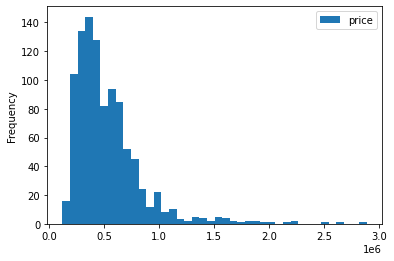

In [194]:
# Histograma dos preços
df.plot(kind="hist", y="price", bins=40)
plt.show()

Observação! **1e6** é equivalente a **1×10⁶**

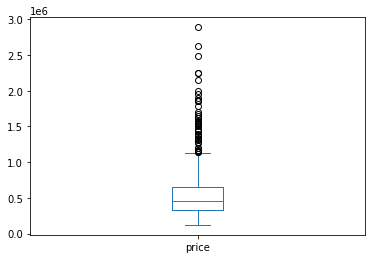

In [195]:
# Boxplot dos preços
df.plot(kind="box", y="price")
plt.show()

__Conclusão:__ 

O preço apresenta distribuição assimétrica, com grande parte dos valores entre 0 e 1 milhão, e poucos valores entre 1 e 3 milhões. 

Vamos colocar uma lupa entre 0 e 1 milhão para visualizar melhor:

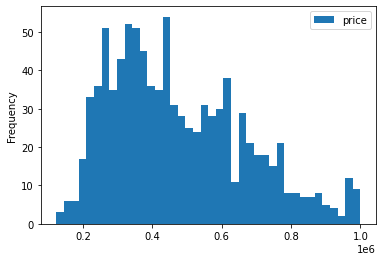

In [196]:
# Histograma filtrando apenas imóveis com preço até 1 milhão
df.loc[df.price <= 1000000].plot(kind="hist", y="price", bins=40)
plt.show()

__Conclusão:__ 

No intervalo até 1 milhão também apresenta distribuição assimétrica. 

### Analisar a Relação do Preço com as Demais Variáveis

As demais variáveis serão usadas para prever o preço do imóvel, são chamadas de __variáveis explicativas (inputs)__ do modelo preditivo!

Dado o conhecimento das variáveis explicativas, o modelo preditivo será aplicado a elas para prever o preço do imóvel.

Quais variáveis explicativas são mais relevantes para estimar o preço do imóvel?

#### Preço x Área Interna (sqft_living)

O preço e a área são variáveis __quantitativas contínuas__, é adequado visualizar com um __gráfico de pontos (scatter plot)__.

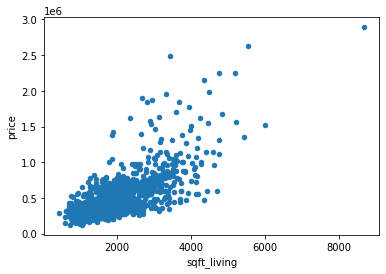

In [197]:
# Scatter plot
df.plot(kind="scatter", y="price", x="sqft_living")
plt.show()

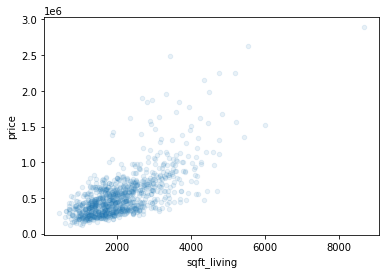

In [198]:
# Scatter plot com transparência (para melhorar a vizualização)
df.plot(kind="scatter", y="price", x="sqft_living", alpha=.1)
plt.show()

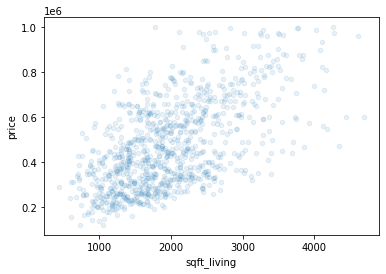

In [199]:
# Scatter plot com foco nos imóveis até 1 milhão
df.loc[df.price <= 1000000].plot(kind="scatter", y="price", x="sqft_living", alpha=.1)
plt.show()

__Conclusão:__ 

* Preço e área interna apresentam relação positiva, quanto maior a área interna, maior o preço do imóvel. 
* Portanto, área interna é uma boa candidata a variável explicativa.

__SUA VEZ!__

Experimente visualizar a relação do preço com outra variável e analise a relação. Sugestão: bedrooms.

In [ ]:
# Inclua seu código abaixo:

Como posso repetir essa análise para todas as variáveis? 

Vamos aprender a usar o loop!

In [200]:
# Listar as colunas do objeto df
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront', 'grade'],
      dtype='object')

In [201]:
# Imprimir o 1º e o 4º item da lista de colunas (obs: o índice começa em 0)
print(df.columns[0])
print(df.columns[3])

id
bathrooms


In [202]:
# Loop para executar comandos com cada item do objeto df.columns
for x in df.columns:
    print('Essa é a variável:', x)

Essa é a variável: id
Essa é a variável: price
Essa é a variável: bedrooms
Essa é a variável: bathrooms
Essa é a variável: sqft_living
Essa é a variável: sqft_lot
Essa é a variável: waterfront
Essa é a variável: grade


__SUA VEZ!__

Use o loop para plotar o gráfico do preço com cada variável.

__Dica:__ Combine os códigos das células anteriores!

In [ ]:
# Inclua seu código abaixo:

__Conclusões:__

* __id:__ não parece ter relação e não tem sentido negocial, deve-se excluir
* __bedrooms:__ parece ter relação positiva (quanto mais quartos, maior o preço), é uma variável quantitativa discreta, sendo mais adequado outro tipo de gráfico para visualizar a relação
* __bathrooms:__ relação positiva, é uma variável quantitativa discreta
* __sqft_living:__ relação positiva
* __sqft_lot:__ não parece ter relação
* __waterfront:__ variável qualitativa nominal
* __grade:__ relação positiva, variável quantitativa discreta

Dada essa conclusão:

* Excluir as variáveis que não parecem ter relação com o preço.
* Para as variáveis discretas ou qualitativas, plotar gráfico mais adequado para avaliar a relação com o preço, por exemplo, boxplot por valor/categoria.

In [203]:
# Excluir variáveis
vars_excluir = ['id', 'sqft_lot']
df.drop(vars_excluir, axis=1, inplace=True)

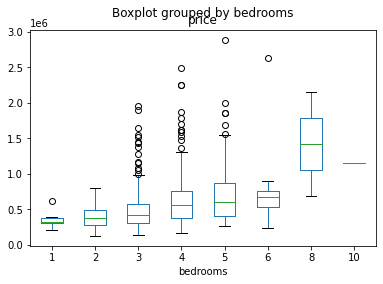

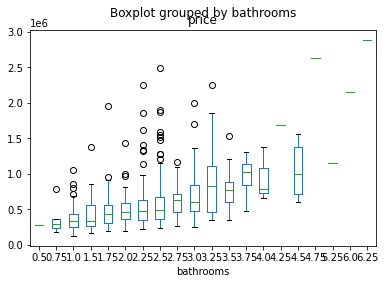

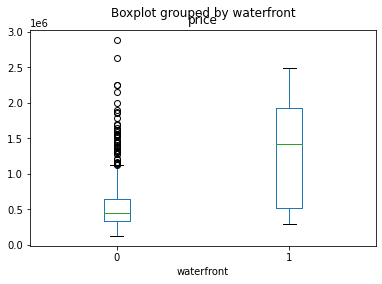

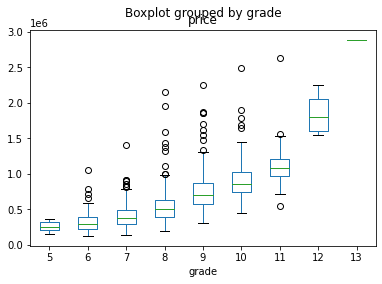

In [208]:
for x in vars_discretas_qualitativas:
    df.boxplot(column='price', by=x, grid=False)
    plt.show()

__Conclusão:__

* __bedrooms:__ correlação positiva
* __bathrooms:__ correlação positiva
* __floors:__ correlação positiva
* __waterfront:__ imóveis que possuem vista para orla possuem preço maior
* __view:__ correlação positiva
* __condition:__ correlação positiva fraca
* __grade:__ correlação positiva

### Análise de Valores Ausentes

Vamos avaliar se as variáveis possuem valores ausentes e identificar a melhor forma de tratá-los.

In [206]:
# Percentual de valores ausentes por variável
100*df.isnull().sum()/len(df)

price          0.0
bedrooms       0.0
bathrooms      0.0
sqft_living    0.0
waterfront     0.0
grade          0.0
dtype: float64

__Conclusão:__ 

Não há valores ausentes, portanto, não é necessário nenhum tratamento.

__Tratamentos identificados e realizados:__

* Exclusão de variáveis que não possuem sentido negocial ou não apresentam relação com o preço. __OK__
* Tratamento de valores missing. __OK__
* Tratamento de variáveis qualitativas (apenas waterfront). __OK__

__Tratamento identificados e ainda não realizados:__

* Padronizar variáveis explicativas para que fiquem na mesma grandeza: aplicar RobustScaler, pois algumas variáveis possuem outliers.

In [ ]:
# Importar bibliotecas para pré-processamento dos dados
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler

In [ ]:
# Selecionar variáveis explicativas para padronização com RobustScaler
vars_explicativas = ['bedrooms', 'bathrooms', 'sqft_living', 'waterfront', 'grade']

In [ ]:
# Definir pre-processamento com padronização
padronizar = RobustScaler(copy=False)
preprocessor = ColumnTransformer(transformers=[('padronizar', padronizar, vars_explicativas)])

__Tratamentos que não serão abordados nesse Workshop:__

* Valores outliers
* Assimetria na distribuição da variável resposta
* Autocorrelação entre variáveis explicativas

---


## 4. Modelagem

Será utilizada __validação cruzada__ para treinar diversos modelos e selecionar o melhor modelo nos dados de __treino__. 

Em seguida esse modelo será aplicado em uma amostra independente do treinamento (dados de __teste__) para avaliação da performance esperada com o uso do modelo.

In [ ]:
# Importar bibliotecas
from sklearn.model_selection import cross_validate, train_test_split # separar dados treino/teste e validação cruzada
from sklearn.pipeline import Pipeline # definir sequência de cálculos para treinar modelos
from sklearn import neighbors, tree, ensemble, linear_model # estimadores para treinar modelos 
from sklearn.metrics import r2_score, median_absolute_error # métrica para avaliar modelos

### Separar dados de treino e teste

A base de __treino__ será utilizada para __treinamento e validação__, enquando a base de __teste__ será utilizada para __avaliação__ do modelo, como uma forma de mensurar de forma independente do treinamento o quão bem o modelo irá performar nos novos dados.

In [ ]:
# Variáveis explicativas no objeto X
X = df[vars_explicativas]

# Variável target no objeto y
y = df['price']

# Separar em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### Treinar Estimadores e Obter Métricas nos Dados de Treino

Dado que tem-se uma __variável resposta quantitativa contínua__, os estimadores adequados são do tipo regressores, foram selecionados 5 estimadores para treinamento e seleção do melhor modelo.

In [ ]:
# Definir estimadores a serem testados
estimadores = [
    linear_model.LinearRegression(),
    neighbors.KNeighborsRegressor(),
    ensemble.RandomForestRegressor(), 
    ensemble.GradientBoostingRegressor()
]

Dentre as métricas adequadas para avaliação de estimadores do tipo regressor, foram escolhidas duas:

* __R2:__ fornece uma noção de quanto da variância da variável resposta é explicado pelas variáveis explicativas, quanto maior melhor.
* __Erro Absoluto Mediano:__ indica a diferença mediana entre os valores priditos e os valores reais, quanto menor melhor, é uma opção interessante dado que tem-se muitos valores outliers na variável repsosta.

In [ ]:
# Definir métricas para seleção do melhor modelo
metricas = [
    'r2', # r2_score
    'neg_median_absolute_error' # median_absolute_error
]

In [ ]:
# Loop para treinamento e captura de performance de cada estimador

# Objeto para armazenar resultado de cada estimador
results = []

for estimador in estimadores:
    
    print('Rodando estimador:', estimador.__class__.__name__)
    
    # Pipeline - sequência de passos de pré-processamento e treinamento do estimador
    my_pipeline = Pipeline(steps=[('preprocesing', preprocessor), 
                                  ('model', estimador)])
    
    # Mensurar métricas de performance usando validação cruzada
    scores = cross_validate(my_pipeline, X_train, y_train, cv=5, scoring=metricas, return_train_score=True)
    
    # Salvar resultados
    results.append({'Estimador':estimador.__class__.__name__, 
                    'R2_treino':scores['train_r2'].mean(),
                    'R2_teste':scores['test_r2'].mean(),
                    'median_abs_error_treino':-scores['train_neg_median_absolute_error'].mean(),
                    'median_abs_error_teste':-scores['test_neg_median_absolute_error'].mean()
                   })

In [ ]:
# Visualizar resultados
pd.DataFrame(results).sort_values('R2_teste', ascending=False)

__Conclusão:__

* Considerando o R2 e o erro absoluto mediano alcançados na base de teste, os 5 modelos apresentaram resultados próximos. Nesse caso, vamos selecionar o modelo de regressão linear por ser mais simples e fácil de interpretar.

In [ ]:
# Treinar modelo selecionado
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor), 
                              ('model', linear_model.LinearRegression())])
my_pipeline.fit(X_train, y_train) 

---

## 5. Avaliação

Uma estimativa de quão bem o modelo preditivo irá performar diante de novos dados, independentes daqueles utilizados para treinamento, é calculada atráves da aplicação do modelo aos dados de teste.

In [ ]:
# Aplicar modelo nos dados de teste
y_test_pred = my_pipeline.predict(X_test)

# Calcular métricas de performance
print("R2:", r2_score(y_test, y_test_pred).round(2))
print("Erro Absoluto Mediano:", median_absolute_error(y_test, y_test_pred).round(2))

In [ ]:
# Construir dataframe para visualização dos resultados
df_test = pd.DataFrame({"observado":y_test,
                        "predito":y_test_pred,
                        "erro":y_test-y_test_pred})

__SUA VEZ!__

Construa um gráfico para visualizar a distribuição dos erros. Dica: histograma.

Construa um gráfico para visualizar a relação entre os valores preditos e os valores observados. Dica: scatter plot.

In [ ]:
# Insira seu código abaixo:

## 6. Aplicação

### __Quer saber quanto custa o imóvel dos seus sonhos?__

In [ ]:
#@title Como seria o imóvel dos seus sonhos? { vertical-output: true, display-mode: "form" }
numero_quartos = 0 #@param {type:"integer"}
numero_banheiros = 0 #@param {type:"integer"}
area_interna = 0 #@param {type:"number"}
vista_orla = 0 #@param {type:"integer"}
qualidade_geral = 0 #@param {type:"integer"}


In [ ]:
df_imovel_sonhos = pd.DataFrame({
    'bedrooms':numero_quartos,
    'bathrooms':numero_banheiros,
    'sqft_living':area_interna,
    'waterfront':vista_orla,
    'grade':qualidade_geral
}, index=['imovel_sonhos'])

In [ ]:
# Prever valor do imóvel dos sonhos
valor_predito = round(my_pipeline.predict(df_imovel_sonhos)[0], 2)
print("Seu imóvel dos sonhos custa aproximadamente", valor_predito, "!!!")